# Semana 4- AceleraDev

### Distribuição de probaliblidades

Neste módulo falaremos sobre distribuições de probabilidades. Esses conceitos são fundamentais para entendermos conceitos avançados de *Machine Learning*

In [1]:
#Imports necessários
from math import sqrt

import pandas as pf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
#Configurações do matplotlib
%matplotlib inline

from IPython.core.pylabtools import figsize

figsize(12, 6)

sns.set()

## Distribuição normal

Em probabilidade e estatística, a distribuição normal é uma das distribuições de probabilidade mais utilizadas para modelar fenômenos naturais.

Isso se deve ao fato de que um grande número de fenômenos naturais apresenta sua distribuição de probabilidade tão proximamente normal, que a ela pode ser com sucesso referida, e, portanto, com adequado acerto por ela representada como se normal fosse. A distribuição normal é ligada a vários conceitos matemáticos como movimento browniano, ruído branco ,entre outros. 

**Ruído Branco**: Em processamento de sinal, o ruído branco é um sinal aleatório com igual intensidade em diferentes frequências, o que lhe dá uma densidade espectral de potência constante.

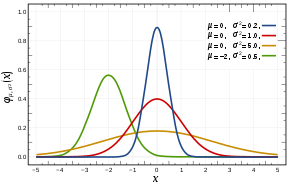

Densidade de probabilidade: 
A cor vermelha representa a função de densidade de probabilidade da distribuição normal padrão ~ N(0,1).

**Densidade de probabilidade**




A distribuição normal padrão é a distribuição com média 0 e desvio padrão 1 é uma variável aleatória padronizada de Z, conforme a equação.



A distribuição Gaussiana possui forma de sino simétrica

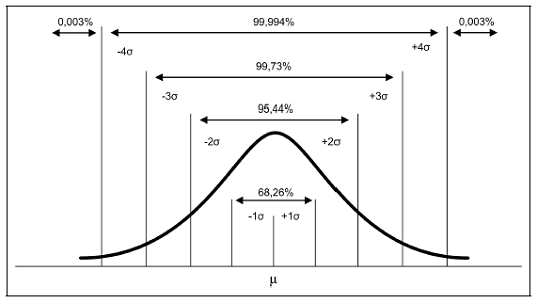



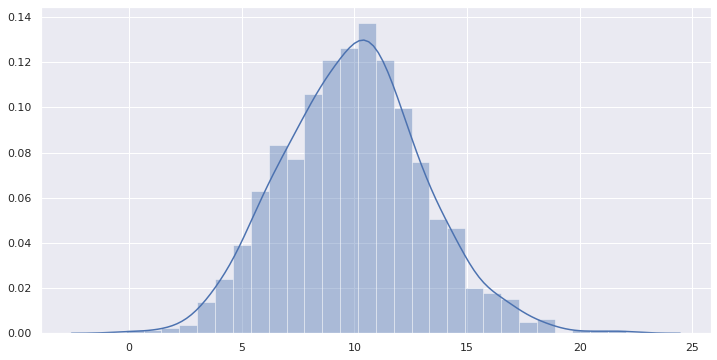

In [3]:
#Gerando uma distribuição normal
norm = sct.norm.rvs(loc=10, scale=3, size=1000) # loc é a média, scale é o desvio padrão. X ~ N(10, 9).

sns.distplot(norm);

Apesar de termos criado a amostra a partir de uma distribuição com média exatamente zero e variância exatamente 9 (populacional), a amostra que geramos possui média amostral e variância amostral ligeiramente diferente de 0 e 9.

In [4]:
#Média e variância
(norm.mean(), norm.var())

(9.964665603959634, 9.65452737000636)

## Função de Densidade de Probabilidade (PDF):

* Descreve a probabilidade relativa de uma variável aleatória tomar um valor dado.
* É não negativa sempre.
* Sua integral sobre todo o espaço é igual a 1.
* Informa a probabilidade da variável X assumir um valor naquele intervalo.


## Função de Distribuição Acumulada (CDF):

* Descreve a probabilidade acumulada de uma variável aleatória tomar um conjunto de valores dado.
* É não negativa sempre.
* Sua integral sobre todo o espaço é igual a 1.
* Informa a probabilidade da variável X assumir um valor naquele intervalo.

In [8]:
#Probabilidade para dados com valores menores que 8
sct.norm.cdf(8, loc=10, scale=3)

0.2524925375469229

Como a distribuição normal é simpetrica em torno da média  probabilidade de $X$ assumir um valor menor ou igual à média deve ser 0.5 (50%), ou seja, $P(X \leq \mu) = 0.5$:

In [9]:
sct.norm.cdf(10, loc=10, scale=3)

0.5


Podemos utilizar a função cdf() em conjunto com a função linspace() do NumPy para gerar um gráfico da CDF:

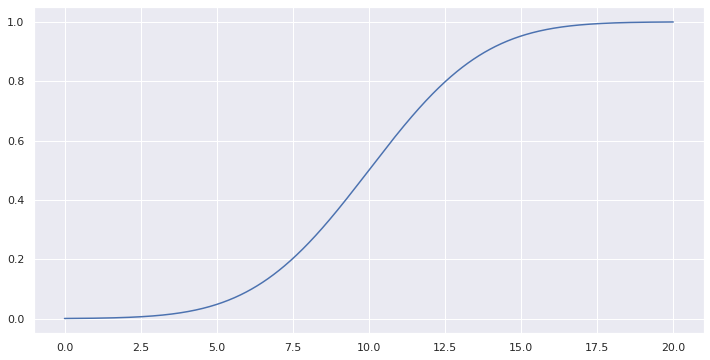

In [10]:
#Shape da curva da distribuição
x = np.linspace(0, 20, num=1000)

f = lambda x: sct.norm.cdf(x, loc=10, scale=3)

cdf = f(x)

sns.lineplot(x, cdf);


Às vezes, estamos interessados no complemento da CDF, ou seja, na probabilidade a partir da outra ponta da distribuição. Para isso, usamos a função sf(). Por exemplo, utilizamos essa função para achar $P(X \geq 8)$:

In [11]:
#Survivior function
sct.norm.sf(8, loc=10, scale=3)

0.7475074624530771

Esse valor é o complemento da probabilidade encontrado acima com a CDF.

**Agora vamos passar a probabilidade acumulada e veremos o valor referente a essa probabilidade. Qual o valor que tem uma probabilidade acumulada de 25%?**

In [14]:
#Probabilidade acumulada
sct.norm.ppf(0.25, loc=10, scale=3)

7.976530749411754

Se quiséssemos o saber o quantil para a probabilidade acumulada a partir da cauda à direita, usaríamos a função isf(). Por exemplo, se quisermos encontrar $x$ tal que $P(X \geq x) = 0.25$:

In [16]:
#Survior Function
sct.norm.isf(0.25, loc=10, scale=3)

12.023469250588246

Por fim, podemos querer saber o valor da função densidade de probabilidade, $f(x)$, em determinado ponto. Apesar de não ser tão útil normalmente (por não ser representar uma probabilidade), ela pode ter seus usos. Para isso, utilizamos a função pdf(). Para acharmos $f(8)$:

In [18]:
sct.norm.pdf(8, loc=10, scale=3)

0.10648266850745075

* Na distribuição normal, a função $f(x)$ assume seu valor máximo na média:

## Distribuição Binomial

Em teoria das probabilidades e estatística, a distribuição binomial é a distribuição de probabilidade discreta do número de sucessos numa sequência de n tentativas tais que:

A distribuição de Bernoulli é uma das mais simples distribuições discretas com apenas um parâmetro, $p$. Ela nos informa sobre a distribuição de uma V.A que toma valor 1 com probabilidade $p$ e valor 0 com probabilidade $q = 1-p$. Portanto, sua função de massa de probabilidade pode ser escrita como:

$$f(x) = p^{x} (1-p)^{1-x}$$
para $x \in \{0, 1\}$. Se $X$ tem distribuição de Bernoulli, denotamos por $X \sim \text{Bernoulli}(p)$.

Note que,se $p = 0.5$, temos basicamente a distribuição do lançar de uma única moeda não viciada.

A distribuição binomial, por sua vez, nos diz sobre a distribuição de uma V.A que é a quantidade de resultados 1 (sucessos) de uma sequência de $n$ lançamentos independentes de uma moeda que tem probabilidade $p$ de sair 1 (por exemplo, cara) e probabilidade $q = 1 - p$ de sair 0 (por exemplo, coroa). Note que cada um dos $n$ lançamentos pode ser modelado individualmente por uma distribuição de Bernoulli.



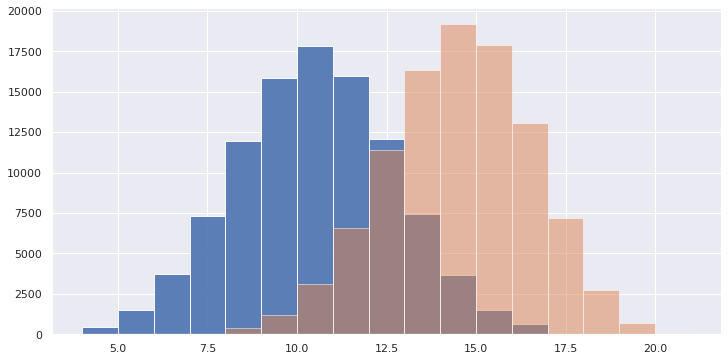

In [19]:
binom_20_05 = sct.binom.rvs(20, 0.5, size=100000) # Média 10, variância 5.
binom_20_07 = sct.binom.rvs(20, 0.7, size=100000) # Média 14, variância 4.2.

sns.distplot(binom_20_05, bins=range(4, 18), kde=False, hist_kws={"alpha": 0.9});
sns.distplot(binom_20_07, bins=range(8, 22), kde=False, hist_kws={"alpha": 0.5});

A maior parte das funções disponíveis para a distribuição normal que apresentamos também está disponível para a distribuição binomial:

mean(): $\mathbb{E}[X]$

var(): $\text{Var}[X]$

rvs(): $\vec{X}$

cdf(): $P(X \leq x)$

sf(): $P(X &gt; x)$

ppf(): $x$ tal que $P(X \leq x) = p$

isf(): $x$ tal que $P(X &gt; x) = p$

A única mudança significativa é na função pmf() ($P(X = x)$), que na normal era chamada pdf() ($f(x)$).


**Exemplo 2:** Qual a probabilidade de obtermos no máximo 3 caras (sucessos) em 20 lançamentos de uma moeda viciada, que tem probabilidade $0.10$ de sair cara?

Resposta:

O que buscamos é

$$P(X \leq 3) = \sum_{i=0}^{3} C(20, i) (0.10)^{i} (0.9)^{20 - i}$$
Uma das formas de resolver isso com SciPy é somar a $f(i)$ para $i \in \{0, 1, 2, 3\}$, usando a função pmf():

In [21]:
# Realiza exatamente o somatório mostrado acima.
sum((sct.binom.pmf(i, 20, 0.10) for i in range(4)))

0.8670466765656644